In [1]:
# !unzip 'Dataset.zip'  # works in paperspace

In [2]:
# # For jupyter notebook in desktop:
# import zipfile

# with zipfile.ZipFile("Dataset.zip", "r") as z:
#     z.extractall(".") # save to current folder as output folder

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Checking the contents of the main directory:
os.listdir('data')

['consumer_transanctions.csv', 'platform_content.csv']

In [5]:
# Creating dataframes:

content_data = pd.read_csv('data/platform_content.csv')
consumer_data = pd.read_csv('data/consumer_transanctions.csv')

In [6]:
content_data.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [7]:
consumer_data.head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN


In [8]:
# EDA on content data:
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [9]:
# Not helpful since these are no numeric columns other than Unique-IDs:
content_data.describe()

,event_timestamp,item_id,producer_id,producer_session_id
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


In [10]:
# Data type casting:

# Convert to datetime
content_data['event_timestamp'] = pd.to_datetime(content_data['event_timestamp'], unit='s')

# Convert to string
content_data['item_id'] = content_data['item_id'].astype('str')
content_data['producer_id'] = content_data['producer_id'].astype('str')
content_data['producer_session_id'] = content_data['producer_session_id'].astype('str')

In [11]:
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   event_timestamp       3122 non-null   datetime64[ns]
 1   interaction_type      3122 non-null   object        
 2   item_id               3122 non-null   object        
 3   producer_id           3122 non-null   object        
 4   producer_session_id   3122 non-null   object        
 5   producer_device_info  680 non-null    object        
 6   producer_location     680 non-null    object        
 7   producer_country      680 non-null    object        
 8   item_type             3122 non-null   object        
 9   item_url              3122 non-null   object        
 10  title                 3122 non-null   object        
 11  text_description      3122 non-null   object        
 12  language              3122 non-null   object        
dtypes: datetime64[ns](

In [12]:
# Same goes for the consumer data. So, not doing the df.describe() on it later.

In [13]:
# What are the different languages in which content is available:
# Checking content_data -> all the columns:
content_data.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'producer_id',
       'producer_session_id', 'producer_device_info', 'producer_location',
       'producer_country', 'item_type', 'item_url', 'title',
       'text_description', 'language'],
      dtype='object')

In [14]:
# What are the different languages in which content is available:
content_data['language'].unique()

array(['en', 'pt', 'es', 'la', 'ja'], dtype=object)

In [15]:
content_data['language'].value_counts()

en    2264
pt     850
la       4
es       2
ja       2
Name: language, dtype: int64

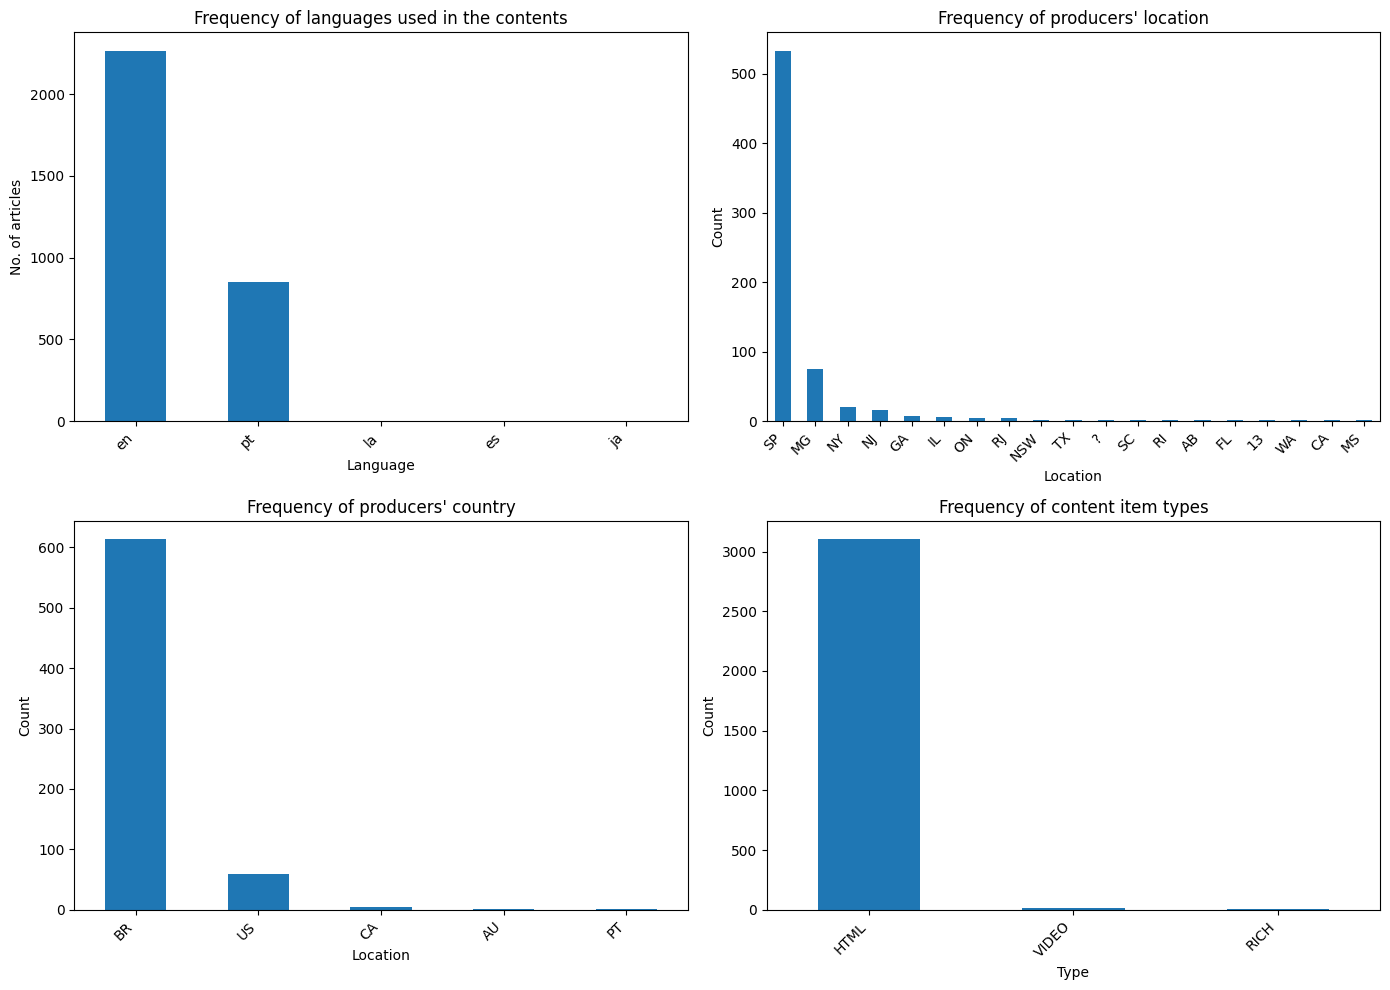

In [16]:
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
content_data['language'].value_counts().plot(kind='bar')
plt.title('Frequency of languages used in the contents')
plt.xlabel('Language')
plt.ylabel('No. of articles')
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,2)
content_data['producer_location'].value_counts().plot(kind='bar') # automatically avoids nan values. No need for ex
plt.title("Frequency of producers' location")
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,3)
content_data['producer_country'].value_counts().plot(kind='bar') # automatically avoids nan values. No need for ex
plt.title("Frequency of producers' country")
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,4)
content_data['item_type'].value_counts().plot(kind='bar') # automatically avoids nan values. No need for ex
plt.title("Frequency of content item types")
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [17]:
consumer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72312 non-null  int64 
 1   interaction_type      72312 non-null  object
 2   item_id               72312 non-null  int64 
 3   consumer_id           72312 non-null  int64 
 4   consumer_session_id   72312 non-null  object
 5   consumer_device_info  56918 non-null  object
 6   consumer_location     56907 non-null  object
 7   country               56918 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [18]:
# Data type casting for consumer data:

# Convert to datetime
consumer_data['event_timestamp'] = pd.to_datetime(consumer_data['event_timestamp'], unit='s')

# Convert to string
consumer_data['item_id'] = consumer_data['item_id'].astype('str')
consumer_data['consumer_id'] = consumer_data['consumer_id'].astype('str')

In [19]:
consumer_data.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'consumer_id',
       'consumer_session_id', 'consumer_device_info', 'consumer_location',
       'country'],
      dtype='object')

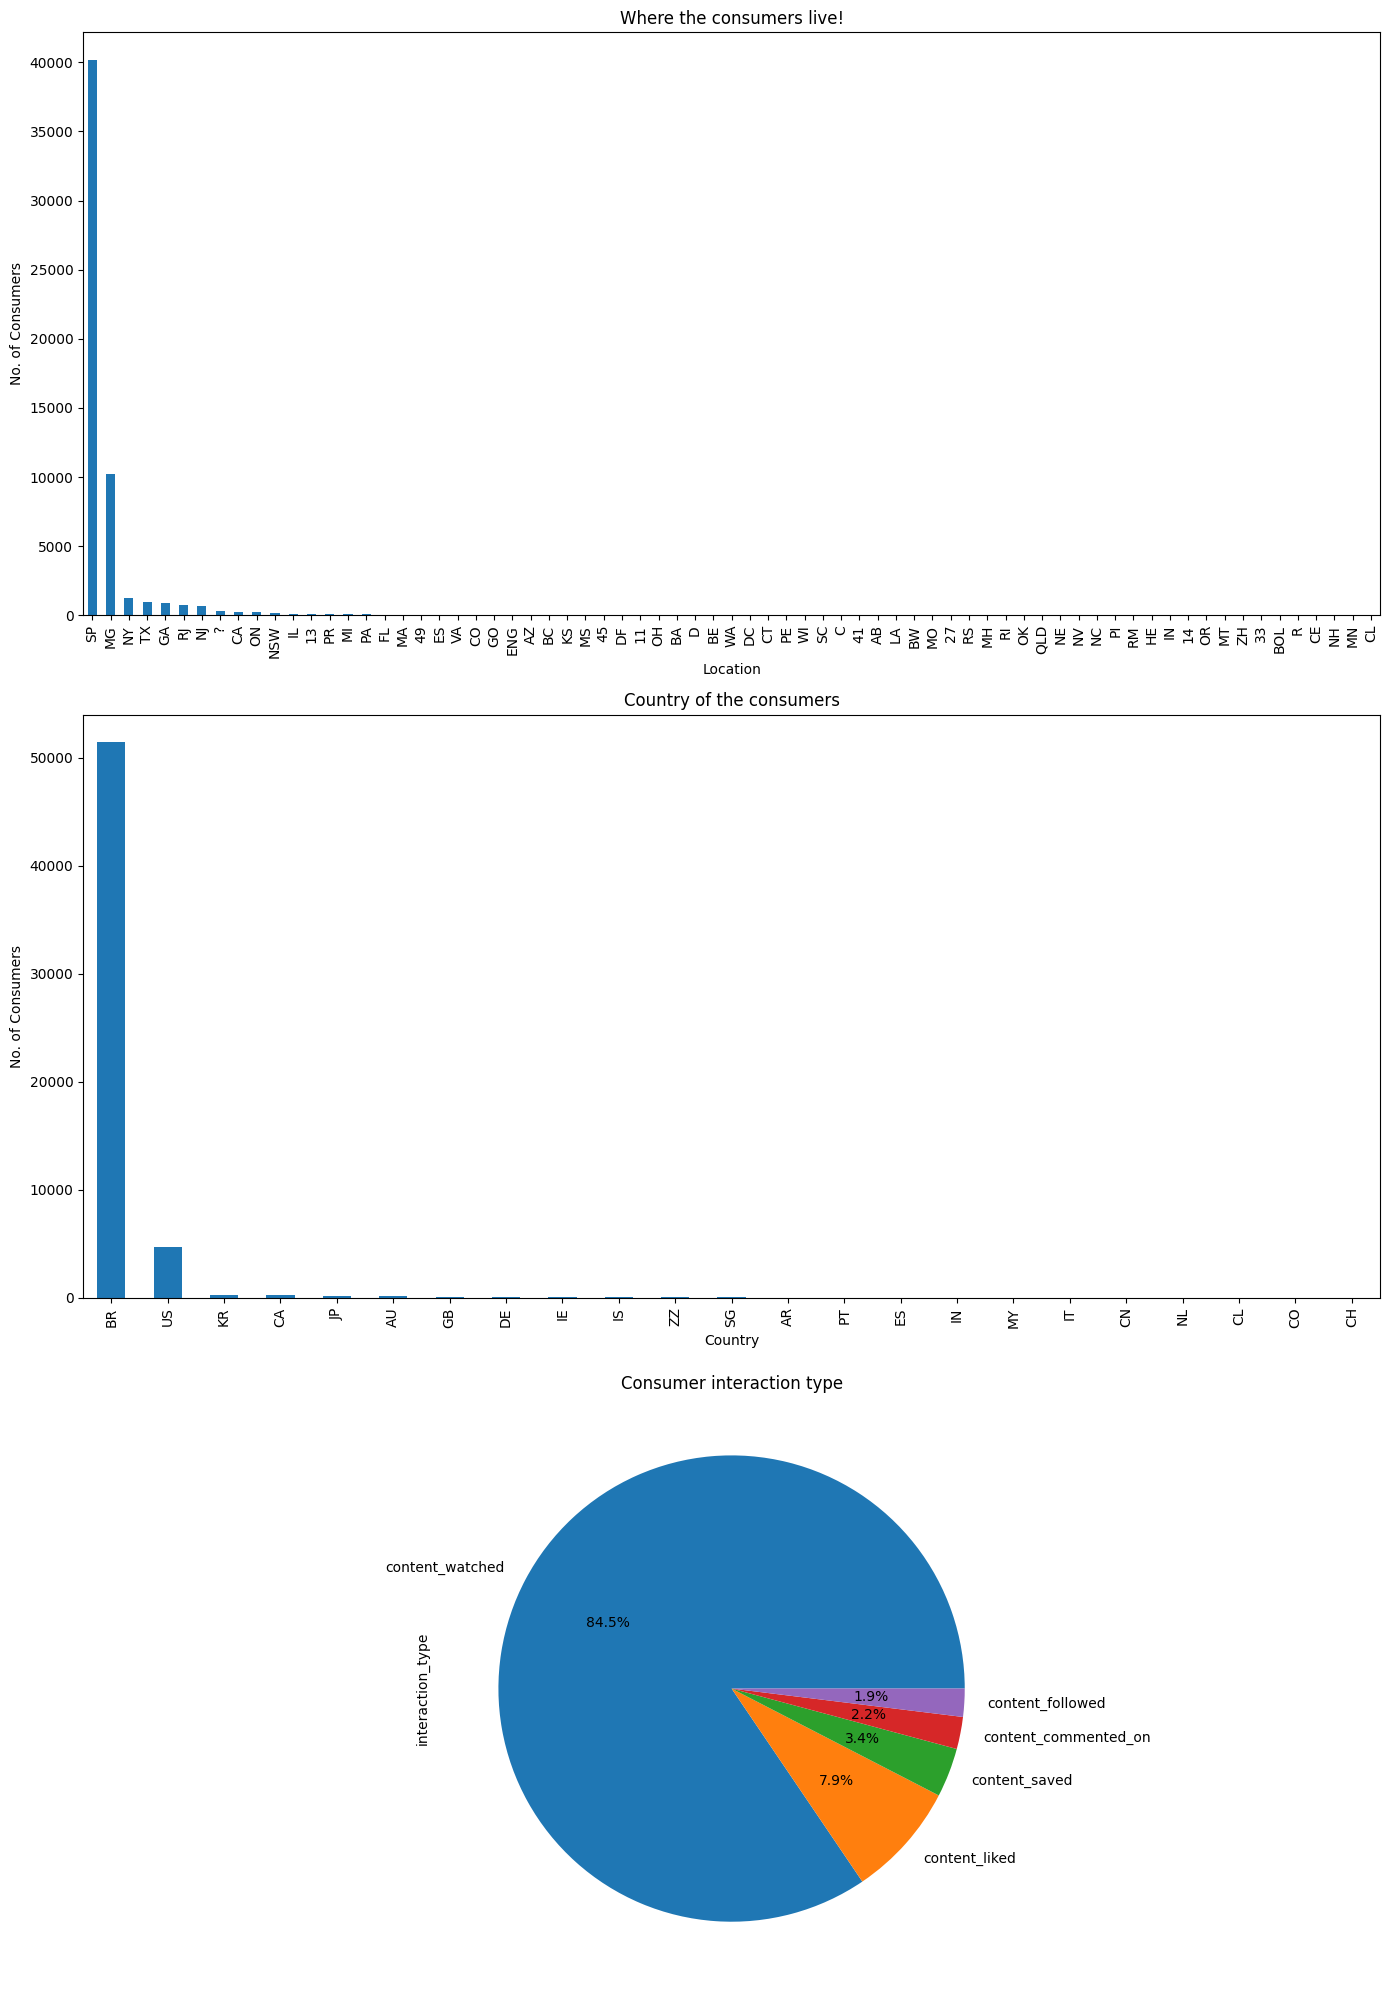

In [20]:
plt.figure(figsize=(14, 20))

plt.subplot(3,1,1)
consumer_data['consumer_location'].value_counts().plot(kind='bar')
plt.title('Where the consumers live!')
plt.xlabel('Location')
plt.ylabel('No. of Consumers')


plt.subplot(3,1,2)
consumer_data['country'].value_counts().plot(kind='bar')
plt.title('Country of the consumers')
plt.xlabel('Country')
plt.ylabel('No. of Consumers')

plt.subplot(3,1,3)
consumer_data['interaction_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Consumer interaction type')


plt.tight_layout()
plt.show()

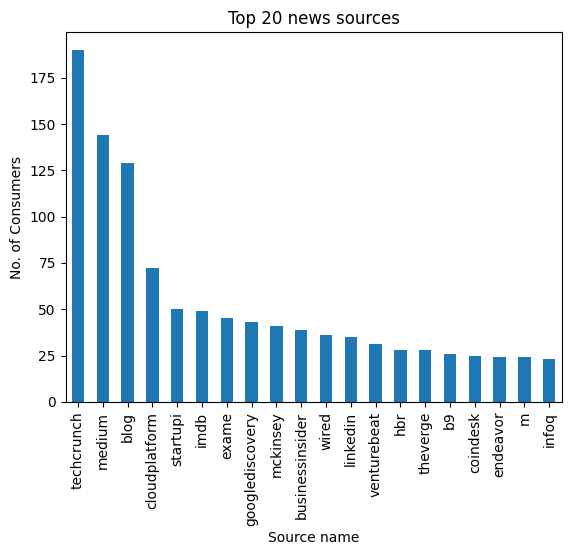

In [21]:
# Feature extraction:
# content_data:
content_data['source'] = (content_data['item_url'].str.extract(r'https?://(?:www\.)?([^./]+)'))
content_data['source'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 news sources')
plt.xlabel('Source name')
plt.ylabel('No. of Consumers')
plt.show()

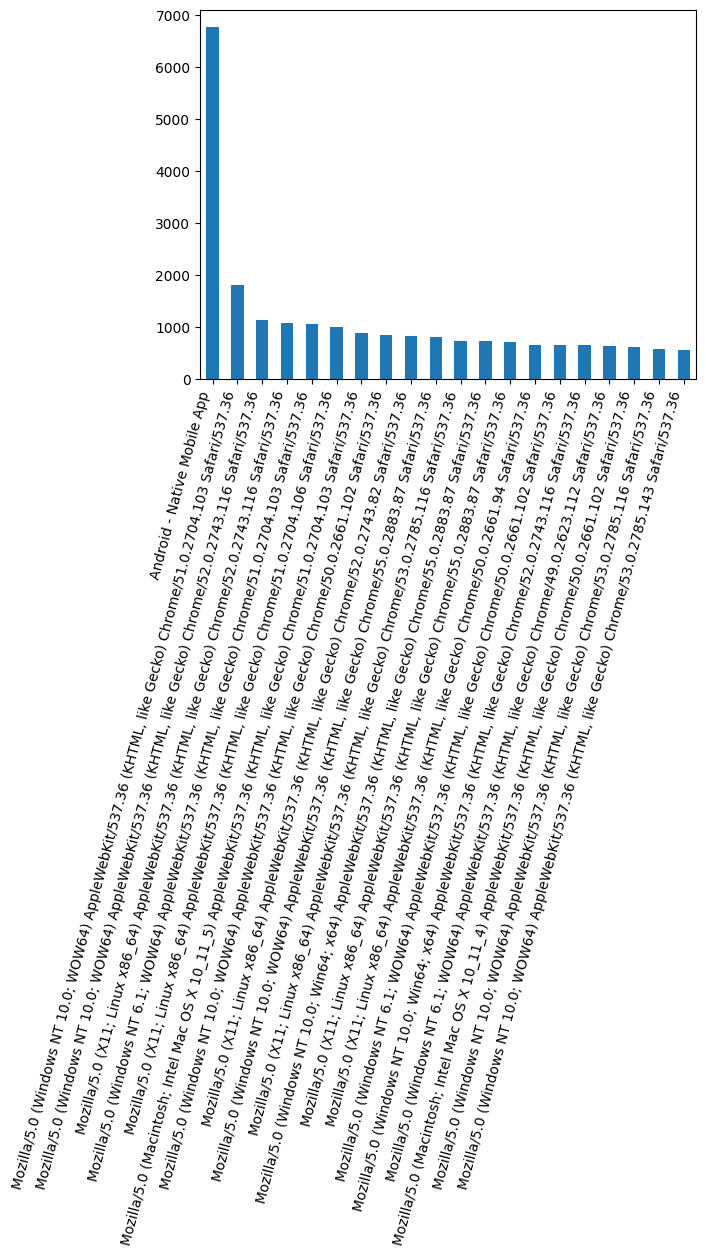

In [22]:
consumer_data['consumer_device_info'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [23]:
pd.set_option('display.max_rows', None)
consumer_data['consumer_device_info'].value_counts().sort_values(ascending=False)

Android - Native Mobile App                                                                                                                                     6761
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                                  1823
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                                  1146
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                                       1076
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                                   1059
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36                                                       1011
Mozilla/5.

In [24]:
# What devices customers are using:

# Original column
ua = consumer_data['consumer_device_info']

# 1. Extract OS / device block from parentheses
os_block = ua.str.extract(r'\(([^)]*)\)', expand=False)

# 2. Fallback: if no parentheses, use the full string
os_block = os_block.fillna(ua)

# 3. Normalize
os_block = os_block.str.lower()

# 4. Classify device / OS
conditions = [
    os_block.str.contains('android', na=False),
    os_block.str.contains('iphone|ipad|ios', na=False),
    os_block.str.contains('windows', na=False),
    os_block.str.contains('macintosh|mac os', na=False),
    os_block.str.contains('linux', na=False),
    os_block.str.contains('x11', na=False)
]

choices = [
    'Android',
    'iOS',
    'Windows',
    'Macintosh',
    'Linux',
    'X11'
]

consumer_data['device_group'] = np.select(
    conditions,
    choices,
    default='NA'
)

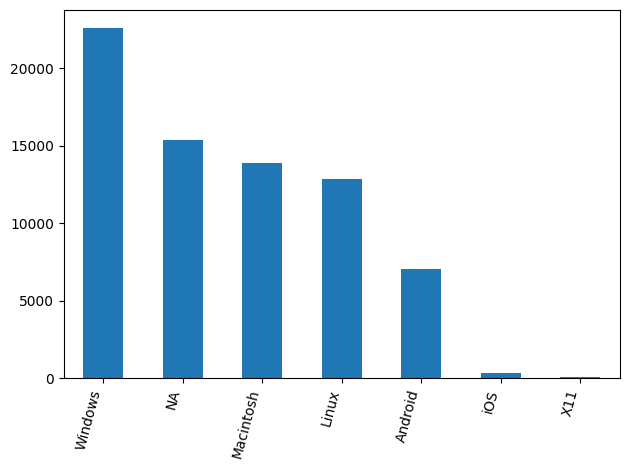

In [25]:
consumer_data['device_group'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# Sanity check for filtering
consumer_data.loc[
    consumer_data['consumer_device_info'].str.lower().str.contains('android', na=False),
    ['consumer_device_info', 'device_group']
]

,consumer_device_info,device_group
57,Android - Native Mobile App,Android
58,Android - Native Mobile App,Android
60,Android - Native Mobile App,Android
68,Android - Native Mobile App,Android
74,Android - Native Mobile App,Android
77,Android - Native Mobile App,Android
81,Android - Native Mobile App,Android
82,Android - Native Mobile App,Android
86,Android - Native Mobile App,Android
100,Android - Native Mobile App,Android


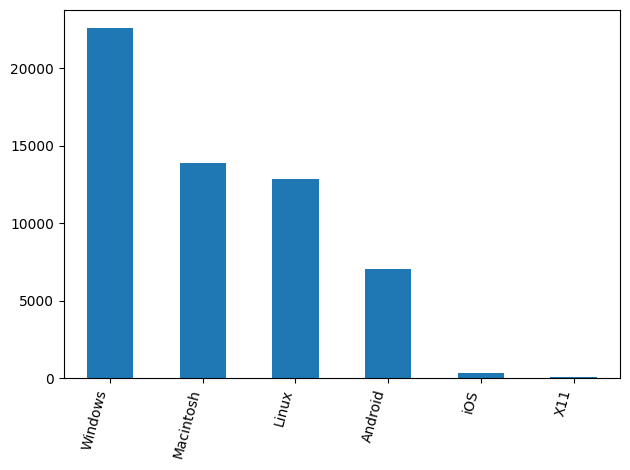

In [27]:
consumer_data['device_group'][consumer_data['device_group']!='NA'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# What are the known devices producers are using:
content_data['producer_device_info']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                                                    NaN
17            

In [29]:
# What the known devices producers are using:

# Original column
ua = content_data['producer_device_info']

# 1. Extract OS / device block from parentheses
os_block = ua.str.extract(r'\(([^)]*)\)', expand=False)

# 2. Fallback: if no parentheses, use the full string
os_block = os_block.fillna(ua)

# 3. Normalize
os_block = os_block.str.lower()

# 4. Classify device / OS
conditions = [
    os_block.str.contains('android', na=False),
    os_block.str.contains('iphone|ipad|ios', na=False),
    os_block.str.contains('windows', na=False),
    os_block.str.contains('macintosh|mac os', na=False),
    os_block.str.contains('linux', na=False),
    os_block.str.contains('x11', na=False)
]

choices = [
    'Android',
    'iOS',
    'Windows',
    'Macintosh',
    'Linux',
    'X11'
]

content_data['producer_device_group'] = np.select(
    conditions,
    choices,
    default='NA'
)

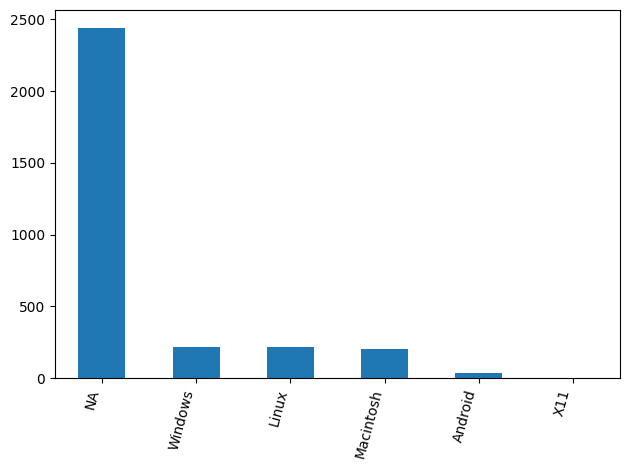

In [30]:
content_data['producer_device_group'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

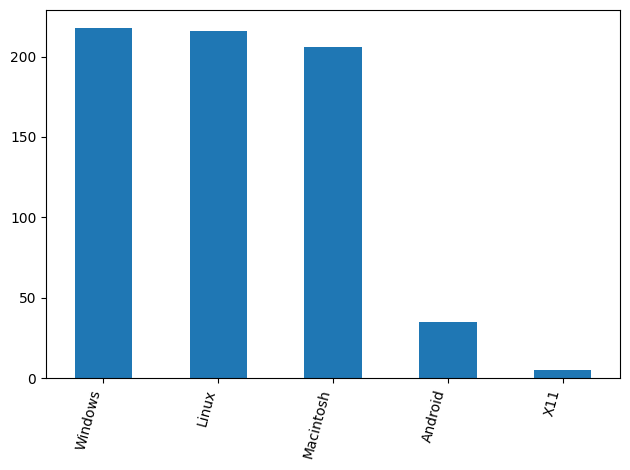

In [31]:
content_data['producer_device_group'][content_data['producer_device_group']!='NA'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

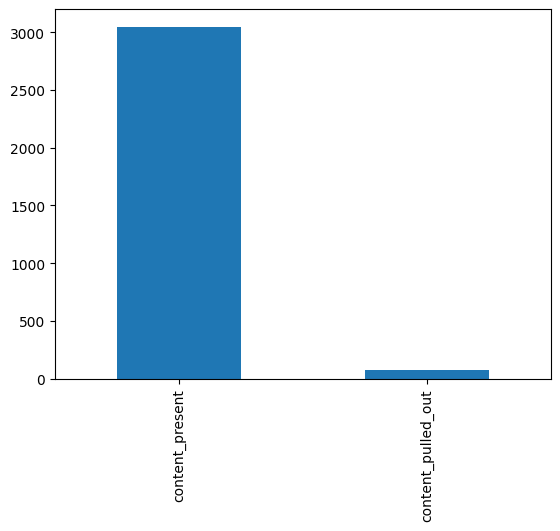

In [32]:
# Content data availability:
content_data['interaction_type'].value_counts().plot(kind='bar')
plt.show()

In [33]:
# Removing content pulled-out:
content_data  = content_data[content_data['interaction_type']=='content_present']
content_data['interaction_type'].value_counts()

content_present    3047
Name: interaction_type, dtype: int64

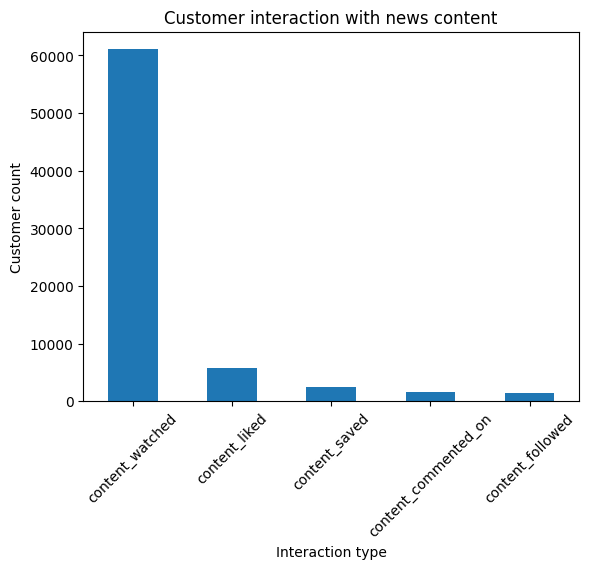

In [34]:
# Consumer interaction with content:
consumer_data['interaction_type'].value_counts().plot(kind='bar')
plt.title('Customer interaction with news content')
plt.xlabel('Interaction type')
plt.ylabel('Customer count')
plt.xticks(rotation=45)
plt.show()

In [35]:
# creating a ratings column based on the above info (interaction type):
consumer_data['interaction_type'].unique()

array(['content_watched', 'content_followed', 'content_saved',
       'content_liked', 'content_commented_on'], dtype=object)

In [36]:
rating_map = {
    'content_watched': 1,
    'content_followed': 2,
    'content_saved': 3,
    'content_liked': 4,
    'content_commented_on': 5
}

consumer_data['rating'] = consumer_data['interaction_type'].map(rating_map).astype('str')
consumer_data[['interaction_type','rating']].head()

,interaction_type,rating
0,content_watched,1
1,content_watched,1
2,content_watched,1
3,content_followed,2
4,content_watched,1


### Content based Recommendation ###

In [37]:
# For this we will be using the content data:
content_data.columns

Index(['event_timestamp', 'interaction_type', 'item_id', 'producer_id',
       'producer_session_id', 'producer_device_info', 'producer_location',
       'producer_country', 'item_type', 'item_url', 'title',
       'text_description', 'language', 'source', 'producer_device_group'],
      dtype='object')

In [38]:
# It has been advised to make recommendations only for English language.
# So, removing articles from other languages for building our content based system

# Creating a separate filtered dataset on which I am going to work
content_df = content_data[content_data['language']=='en']
content_df['language'].value_counts()

en    2211
Name: language, dtype: int64

In [39]:
# Keeping only the columns required for 'content based recommendation development':
content_df = content_df[['item_id','title','text_description','item_url']]
content_df.head(10)

,item_id,title,text_description,item_url
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,http://www.nytimes.com/2016/03/28/business/dea...
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,http://cointelegraph.com/news/bitcoin-future-w...
3,-6151852268067518688,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,https://cloudplatform.googleblog.com/2016/03/G...
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,https://bitcoinmagazine.com/articles/ibm-wants...
5,-2826566343807132236,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,http://www.coindesk.com/ieee-blockchain-oxford...
6,-2148899391355011268,Banks Need To Collaborate With Bitcoin and Fin...,It will take time until banks come around to t...,http://www.newsbtc.com/2016/03/28/banks-need-c...
7,4119190424078847945,Blockchain Technology Could Put Bank Auditors ...,When most people think about computers and rob...,https://bitcoinmagazine.com/articles/blockchai...
8,-7926018713416777892,Why Decentralized Conglomerates Will Scale Bet...,"Bitcoin.com spoke with the OpenLedger CEO, Ron...",https://news.bitcoin.com/conglomerates-intervi...
9,3353902017498793780,The Rise And Growth of Ethereum Gets Mainstrea...,"Ethereum, considered by many to be the most pr...",https://www.cryptocoinsnews.com/ethereum-rise-...
11,1805789466376069146,Setting Up HTTP(S) Load Balancing,HTTP(S) load balancing provides global load ba...,https://cloud.google.com/compute/docs/load-bal...


In [40]:
# Checking the number of words in the longest title: (Just for information)
content_df['title'].str.split().str.len().max()

24

In [41]:
# Checking the number of words in the longest description: 
content_df['text_description'].str.split().str.len().max()

19154

In [42]:
content_df.shape

(2211, 4)

In [43]:
# Creating a keywords column: Title + text_description

content_df['keywords_with_stop'] = (content_df['title'].fillna('') + ' ' + content_df['text_description'].fillna('')).str.strip()
content_df['keywords_with_stop'].head()

1    Ethereum, a Virtual Currency, Enables Transact...
2    Bitcoin Future: When GBPcoin of Branson Wins O...
3    Google Data Center 360° Tour We're excited to ...
4    IBM Wants to "Evolve the Internet" With Blockc...
5    IEEE to Talk Blockchain at Cloud Computing Oxf...
Name: keywords_with_stop, dtype: object

In [44]:
content_df['keywords_with_stop'][2]

'Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi per second. The current BTC exchange rate makes that snooze button a costly proposition! So I get up, make coffee and go to my computer to check the overnight performance of my bots. TradeBot earns me on Trump and Branson TradeBot, which allocates funds between the main chain and various national currency side-chains, generated a lucrative 0.24 BTC return. TradeBot has been reliably profitable ever since I set it to trade USDcoin according to political prediction market data. As expected, the latest poll numbers came in as highly supportive of Trump\'s re-election as USDcoin CEO. Trump\'s resistance to de-anonymizing public spending, by moving USDcoin off the Confidential Transactions layer, continues to erode his coin\'s credibility. In his latest speech, Trump maintains that full CT-privacy is essential to "combatting CNY

In [45]:
content_df['title'][2]

'Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump'

In [46]:
content_df['text_description'][2]

'The alarm clock wakes me at 8:00 with stream of advert-free broadcasting, charged at one satoshi per second. The current BTC exchange rate makes that snooze button a costly proposition! So I get up, make coffee and go to my computer to check the overnight performance of my bots. TradeBot earns me on Trump and Branson TradeBot, which allocates funds between the main chain and various national currency side-chains, generated a lucrative 0.24 BTC return. TradeBot has been reliably profitable ever since I set it to trade USDcoin according to political prediction market data. As expected, the latest poll numbers came in as highly supportive of Trump\'s re-election as USDcoin CEO. Trump\'s resistance to de-anonymizing public spending, by moving USDcoin off the Confidential Transactions layer, continues to erode his coin\'s credibility. In his latest speech, Trump maintains that full CT-privacy is essential to "combatting CNYcoin\'s sinister ring-signature scheming." I make a note to increas

In [47]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = set(ENGLISH_STOP_WORDS)

def clean_text(text):
    if pd.isna(text):
        return text

    words = text.split()   # split string → words
    cleaned = []

    for w in words:
        w_clean = re.sub(r"[^a-zA-Z]", "", w.lower())
        if w_clean and w_clean not in stop_words:
            cleaned.append(w_clean)

    return " ".join(cleaned)

In [48]:
content_df['keywords_clean'] = content_df['keywords_with_stop'].apply(clean_text)

In [49]:
content_df['keywords_clean'].head()

1    ethereum virtual currency enables transactions...
2    bitcoin future gbpcoin branson wins usdcoin tr...
3    google data center tour excited share google d...
4    ibm wants evolve internet blockchain technolog...
5    ieee talk blockchain cloud computing oxfordcon...
Name: keywords_clean, dtype: object

In [50]:
content_df.head()

,item_id,title,text_description,item_url,keywords_with_stop,keywords_clean
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",ethereum virtual currency enables transactions...
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,bitcoin future gbpcoin branson wins usdcoin tr...
3,-6151852268067518688,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour We're excited to ...,google data center tour excited share google d...
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",ibm wants evolve internet blockchain technolog...
5,-2826566343807132236,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,ieee talk blockchain cloud computing oxfordcon...


In [51]:
content_df = content_df[['item_id','title','keywords_clean','item_url']]
content_df.head()

,item_id,title,keywords_clean,item_url
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transact...",ethereum virtual currency enables transactions...,http://www.nytimes.com/2016/03/28/business/dea...
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins O...,bitcoin future gbpcoin branson wins usdcoin tr...,http://cointelegraph.com/news/bitcoin-future-w...
3,-6151852268067518688,Google Data Center 360° Tour,google data center tour excited share google d...,https://cloudplatform.googleblog.com/2016/03/G...
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockc...",ibm wants evolve internet blockchain technolog...,https://bitcoinmagazine.com/articles/ibm-wants...
5,-2826566343807132236,IEEE to Talk Blockchain at Cloud Computing Oxf...,ieee talk blockchain cloud computing oxfordcon...,http://www.coindesk.com/ieee-blockchain-oxford...


In [52]:
print(content_df['keywords_clean'][2].split())

['bitcoin', 'future', 'gbpcoin', 'branson', 'wins', 'usdcoin', 'trump', 'alarm', 'clock', 'wakes', 'stream', 'advertfree', 'broadcasting', 'charged', 'satoshi', 'second', 'current', 'btc', 'exchange', 'rate', 'makes', 'snooze', 'button', 'costly', 'proposition', 'make', 'coffee', 'computer', 'check', 'overnight', 'performance', 'bots', 'tradebot', 'earns', 'trump', 'branson', 'tradebot', 'allocates', 'funds', 'main', 'chain', 'various', 'national', 'currency', 'sidechains', 'generated', 'lucrative', 'btc', 'return', 'tradebot', 'reliably', 'profitable', 'set', 'trade', 'usdcoin', 'according', 'political', 'prediction', 'market', 'data', 'expected', 'latest', 'poll', 'numbers', 'came', 'highly', 'supportive', 'trumps', 'reelection', 'usdcoin', 'ceo', 'trumps', 'resistance', 'deanonymizing', 'public', 'spending', 'moving', 'usdcoin', 'confidential', 'transactions', 'layer', 'continues', 'erode', 'coins', 'credibility', 'latest', 'speech', 'trump', 'maintains', 'ctprivacy', 'essential', '

In [53]:
content_df['keywords_clean'] = content_df['keywords_clean'].str.split()
content_df['keywords_clean'] = content_df['keywords_clean'].str.join(',')
content_df['keywords_clean'].head()

1    ethereum,virtual,currency,enables,transactions...
2    bitcoin,future,gbpcoin,branson,wins,usdcoin,tr...
3    google,data,center,tour,excited,share,google,d...
4    ibm,wants,evolve,internet,blockchain,technolog...
5    ieee,talk,blockchain,cloud,computing,oxfordcon...
Name: keywords_clean, dtype: object

In [54]:
keywords_array = content_df['keywords_clean'].to_numpy()

In [55]:
keywords_array[:3]

array(['ethereum,virtual,currency,enables,transactions,rival,bitcoins,work,early,public,version,ethereum,software,recently,released,face,technical,legal,problems,tarnished,bitcoin,bitcoin,advocates,say,ethereum,face,security,problems,bitcoin,greater,complexity,software,far,ethereum,faced,testing,fewer,attacks,bitcoin,novel,design,ethereum,invite,intense,scrutiny,authorities,given,potentially,fraudulent,contracts,like,ponzi,schemes,written,directly,ethereum,sophisticated,capabilities,fascinating,executives,corporate,america,ibm,said,year,experimenting,ethereum,way,control,real,world,objects,socalled,internet,things,microsoft,working,projects,make,easier,use,ethereum,computing,cloud,azure,ethereum,general,platform,solve,problems,industries,using,fairly,elegant,solution,elegant,solution,seen,date,said,marley,gray,director,business,development,strategy,microsoft,mr,gray,responsible,microsofts,work,blockchains,database,concept,bitcoin,introduced,blockchains,designed,store,transactions,data,

In [56]:
keywords_array[0]

'ethereum,virtual,currency,enables,transactions,rival,bitcoins,work,early,public,version,ethereum,software,recently,released,face,technical,legal,problems,tarnished,bitcoin,bitcoin,advocates,say,ethereum,face,security,problems,bitcoin,greater,complexity,software,far,ethereum,faced,testing,fewer,attacks,bitcoin,novel,design,ethereum,invite,intense,scrutiny,authorities,given,potentially,fraudulent,contracts,like,ponzi,schemes,written,directly,ethereum,sophisticated,capabilities,fascinating,executives,corporate,america,ibm,said,year,experimenting,ethereum,way,control,real,world,objects,socalled,internet,things,microsoft,working,projects,make,easier,use,ethereum,computing,cloud,azure,ethereum,general,platform,solve,problems,industries,using,fairly,elegant,solution,elegant,solution,seen,date,said,marley,gray,director,business,development,strategy,microsoft,mr,gray,responsible,microsofts,work,blockchains,database,concept,bitcoin,introduced,blockchains,designed,store,transactions,data,requiri

In [57]:
type(keywords_array[0])

str

In [58]:
# Generate Words from Keywords Array by Splitting:
# Generating word list:
words_list = []
for keyword in keywords_array:
    splitted_words = keyword.lower().split(',')
    words_list.append(splitted_words)

In [59]:
print(words_list[0])

['ethereum', 'virtual', 'currency', 'enables', 'transactions', 'rival', 'bitcoins', 'work', 'early', 'public', 'version', 'ethereum', 'software', 'recently', 'released', 'face', 'technical', 'legal', 'problems', 'tarnished', 'bitcoin', 'bitcoin', 'advocates', 'say', 'ethereum', 'face', 'security', 'problems', 'bitcoin', 'greater', 'complexity', 'software', 'far', 'ethereum', 'faced', 'testing', 'fewer', 'attacks', 'bitcoin', 'novel', 'design', 'ethereum', 'invite', 'intense', 'scrutiny', 'authorities', 'given', 'potentially', 'fraudulent', 'contracts', 'like', 'ponzi', 'schemes', 'written', 'directly', 'ethereum', 'sophisticated', 'capabilities', 'fascinating', 'executives', 'corporate', 'america', 'ibm', 'said', 'year', 'experimenting', 'ethereum', 'way', 'control', 'real', 'world', 'objects', 'socalled', 'internet', 'things', 'microsoft', 'working', 'projects', 'make', 'easier', 'use', 'ethereum', 'computing', 'cloud', 'azure', 'ethereum', 'general', 'platform', 'solve', 'problems', 

In [60]:
print(words_list[5])

['banks', 'need', 'collaborate', 'bitcoin', 'fintech', 'developers', 'time', 'banks', 'come', 'idea', 'embracing', 'bitcoin', 'fintech', 'banks', 'need', 'innovate', 'accelerated', 'pace', 'unable', 'allowing', 'thirdparty', 'developers', 'work', 'bank', 'api', 'access', 'significant', 'step', 'right', 'direction', 'valuable', 'input', 'gathered', 'bitcoin', 'fintech', 'industries', 'banks', 'established', 'financial', 'players', 'taken', 'liking', 'fintech', 'digital', 'currency', 'just', 'industries', 'major', 'competitors', 'offerings', 'certainly', 'true', 'bitcoin', 'fintech', 'bring', 'significant', 'improvements', 'table', 'seen', 'complementary', 'allies', 'bring', 'success', 'banking', 'industry', 'monetary', 'authority', 'singapore', 'thinking', 'read', 'bitcoin', 'price', 'technical', 'analysis', 'looking', 'buy', 'btc', 'embracing', 'bitcoin', 'fintech', 'bank', 'necessary', 'denying', 'banking', 'sector', 'seen', 'little', 'real', 'innovation', 'quite', 'time', 'opening', 

In [61]:
len(words_list), len(words_list[0]), len(words_list[5])

(2211, 528, 330)

In [62]:
# Create Dictionary:

# !pip install gensim

In [63]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(words_list) 
len(dictionary)

55471

In [64]:
len(words_list) # indicates the the total number of articles

2211

In [65]:
number_words = 0
for word in words_list:
    number_words = number_words + len(word)  # indicates the total number of words all total in the word list. 

In [66]:
number_words

1137867

In [67]:
dictionary.get(0), dictionary.get(1), dictionary.get(100)

('actual', 'advocates', 'ethereum')

In [68]:
# Build corpus (BoW for each document)
corpus = [dictionary.doc2bow(doc) for doc in words_list]

In [69]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 3), (24, 2), (25, 1), (26, 16), (27, 1), (28, 5), (29, 4), (30, 1), (31, 2), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 2), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 3), (54, 2), (55, 1), (56, 2), (57, 1), (58, 2), (59, 1), (60, 2), (61, 1), (62, 2), (63, 1), (64, 3), (65, 1), (66, 1), (67, 1), (68, 4), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 9), (100, 27), (101, 1), (102, 1), (103, 2), (104, 1), (105, 2), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1

In [70]:
len(corpus)

2211

In [71]:
# Train TF-IDF model
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus)

In [72]:
# Model is now available
tfidf

In [73]:
# lets check tfidf scores for a single corupus element:
tfidf[corpus[0]]

[(0, 0.01508986462905802),
 (1, 0.03127255324910769),
 (2, 0.022576296046636194),
 (3, 0.028440815081365884),
 (4, 0.020313156363055838),
 (5, 0.015058988148681287),
 (6, 0.020344001734681462),
 (7, 0.03865286633359517),
 (8, 0.020313156363055838),
 (9, 0.01083260777962285),
 (10, 0.009612779285744904),
 (11, 0.017787613717257164),
 (12, 0.02578405437852955),
 (13, 0.028969880078157925),
 (14, 0.03088788370680759),
 (15, 0.03492329869946431),
 (16, 0.024301743805927613),
 (17, 0.012758993932466916),
 (18, 0.021999070634977847),
 (19, 0.054534614887371),
 (20, 0.007797205951234864),
 (21, 0.013437051725701431),
 (22, 0.015950414140198967),
 (23, 0.0680334596389779),
 (24, 0.027917722055877878),
 (25, 0.028699834890106808),
 (26, 0.3250105018088934),
 (27, 0.0264897926226284),
 (28, 0.09822316456503752),
 (29, 0.11942673666094715),
 (30, 0.021729025446926738),
 (31, 0.08893365300329052),
 (32, 0.019395773401387983),
 (33, 0.07134128866657376),
 (34, 0.018648427767565413),
 (35, 0.0070925

0,1,2.... : These are integer IDs assigned by the Gensim Dictionary.
e.g. 0 → 'ethereum', 1 → 'blockchain', 2 → 'bitcoin' etc. (This is just an example)<br>
0.01508, 0.03127, 0.03865,... : This value measures how important that word is in this document.

In [74]:
# Build similarity index
from gensim.similarities import MatrixSimilarity

sims = MatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

In [75]:
print(sims)

MatrixSimilarity<2211 docs, 55471 features>


In [76]:
len(sims[corpus[0]])

2211

In [77]:
len(sims[corpus[4]])

2211

The similarity vector always has one score per document, so its length equals the corpus size—regardless of which document you query.

### Content-based movie recommendation system ###

In [78]:
def news_recommendation_content_based(article_id=None, query_text=None, top_k=10):
    # --- Safety check ---
    if article_id is None and query_text is None:
        raise ValueError("Provide either article_id or query_text")

    # --- Case 1: article_id provided ---
    if article_id is not None:
        article = content_df.loc[keywords['item_id'] == article_id]

        if article.empty:
            raise ValueError("Article ID not found")

        # Use article keywords as query
        query_tokens = article['keywords'].iloc[0].split()

    # --- Case 2: query_text provided ---
    else:
        # Clean and tokenize query text
        query_tokens = query_text.lower().split()

    # --- Convert query to BoW ---
    query_bow = dictionary.doc2bow(query_tokens)

    # --- Convert BoW to TF-IDF ---
    query_tfidf = tfidf[query_bow]

    # --- Compute similarity ---
    similarity_scores = sims[query_tfidf]

    # --- Convert to Series with item_id index ---
    similarity_series = pd.Series(
        similarity_scores,
        index=content_df['item_id']
    )

    # --- Sort and remove self-match if article_id was used ---
    similarity_series = similarity_series.sort_values(ascending=False)

    if article_id is not None:
        similarity_series = similarity_series.drop(article_id)

    # --- Get top-K results ---
    top_items = similarity_series.head(top_k).index

    return content_df.loc[
        content_df['item_id'].isin(top_items),
        ['title','item_url']
    ]

In [79]:
news_recommendation_content_based(query_text='ethereum',top_k=10)

,title,item_url
1,"Ethereum, a Virtual Currency, Enables Transact...",http://www.nytimes.com/2016/03/28/business/dea...
9,The Rise And Growth of Ethereum Gets Mainstrea...,https://www.cryptocoinsnews.com/ethereum-rise-...
83,Microsoft Adds Ethereum to Windows Platform Fo...,http://www.coindesk.com/microsoft-ethereum-3-m...
112,Solidity Available in Visual Studio - Ethereum...,https://blog.ethereum.org/2016/03/30/solidity-...
115,Cashila Announces Convenient Buy and Sell Feat...,http://bitcoinist.net/cashila-announces-conven...
119,Decentralized Options Exchange Etheropt Uses A...,http://www.newsbtc.com/2016/03/30/decentralize...
184,Ethereum and Bitcoin Are Market Leaders But No...,http://www.newsbtc.com/2016/04/02/ethereum-bit...
185,"Google Failure, Ethereum Leaps, ECB Giveout in...",http://cointelegraph.com/news/google-failure-e...
187,Microsoft Continues to Embrace Ethereum & Bitc...,https://news.bitcoin.com/microsoft-embrace-dig...
525,"For Blockchain VCs, the Time for Ethereum Inve...",http://www.coindesk.com/first-ethereum-startup...


In [80]:
news_recommendation_content_based(query_text='3353902017498793780',top_k=10)

,title,item_url
1,"Ethereum, a Virtual Currency, Enables Transact...",http://www.nytimes.com/2016/03/28/business/dea...
2042,Today in Apple history: Happy birthday Steve W...,http://www.cultofmac.com/441723/today-in-apple...
2043,Apple rehires former senior iOS engineer turne...,https://9to5mac.com/2016/08/11/apple-rehires-f...
2045,[Security] How to Set Expiration Dates for Sha...,http://www.labnol.org/internet/auto-expire-goo...
2051,Angular 2 versus React: There Will Be Blood - ...,https://medium.freecodecamp.com/angular-2-vers...
2052,"There will be a Drupal 9, and here is why",http://hojtsy.hu/blog/2016-aug-09/there-will-b...
2053,Invisible Banking,https://manage.kmail-lists.com/subscriptions/w...
2054,Add the Same File to Multiple Folders in Googl...,http://www.labnol.org/internet/add-files-multi...
2055,Savage Love Letter of the Day: Get Out There a...,http://www.thestranger.com/slog/2016/06/14/242...
2064,Frequent password changes are the enemy of sec...,http://arstechnica.com/security/2016/08/freque...


----------------x--------------------------x----------------------------------x----------------